Data Analysis 

In [5]:
#import required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import missingno as msno
from plotnine import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load datasets
courses = pd.read_csv('~/finalproject/LHL-finalproject/datasets/courses.csv')
assessments = pd.read_csv('~/finalproject/LHL-finalproject/datasets/assessments.csv')
studentinfo = pd.read_csv('~/finalproject/LHL-finalproject/datasets/studentInfo.csv')
studentRegistration = pd.read_csv('~/finalproject/LHL-finalproject/datasets/studentRegistration.csv')
studentAssessment = pd.read_csv('~/finalproject/LHL-finalproject/datasets/studentAssessment.csv')

#Large files, couldn't be loaded to git
studentVle = pd.read_csv('~/finalproject/LHL-finalproject/datasets/studentvle.csv', nrows=999999)
vle = pd.read_csv('~/finalproject/LHL-finalproject/datasets/vle.csv')

Explore each file to gain an understanding of the dataset

Exploring the Courses data file

In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [9]:
courses.shape

(22, 3)

In [8]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [11]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


Aggregate using groupby operation, group the rows of the data based on code_module column and code_presentation

In [10]:
#use course module and module presentation to group data
courses.groupby(['code_module', 'code_presentation']).agg(['min', 'max'])

module_presentation_length     
                                                     min  max
code_module code_presentation                                
AAA         2013J                                    268  268
            2014J                                    269  269
BBB         2013B                                    240  240
            2013J                                    268  268
            2014B                                    234  234
            2014J                                    262  262
CCC         2014B                                    241  241
            2014J                                    269  269
DDD         2013B                                    240  240
            2013J                                    261  261
            2014B                                    241  241
            2014J                                    262  262
EEE         2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
FFF         2013B                                    240  240
            2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
GGG         2013J                                    261  261
            2014B                                    241  241
            2014J                                    269  269

There are 7 course modules
There are 2 semesters B and J, B for february cohort J for October cohort
AAA was only presented in October for 2013 and 2014

In [12]:
#Basic Summary statistics for the 'module_presentation_length' MPL
summary_stats_MPL = courses['module_presentation_length'].describe()

# Print the summary statistics
print(summary_stats_MPL)



count     22.000000
mean     255.545455
std       13.654677
min      234.000000
25%      241.000000
50%      261.500000
75%      268.000000
max      269.000000
Name: module_presentation_length, dtype: float64


this gives an overview of the distribution of presentation lengths, central tendencies and variations of data

COMPARATIVE ANALYSIS

Compare presentation lengths between different modules or presentations. Are there certain modules or presentations that consistently have longer or shorter lengths? Are there any outliers?

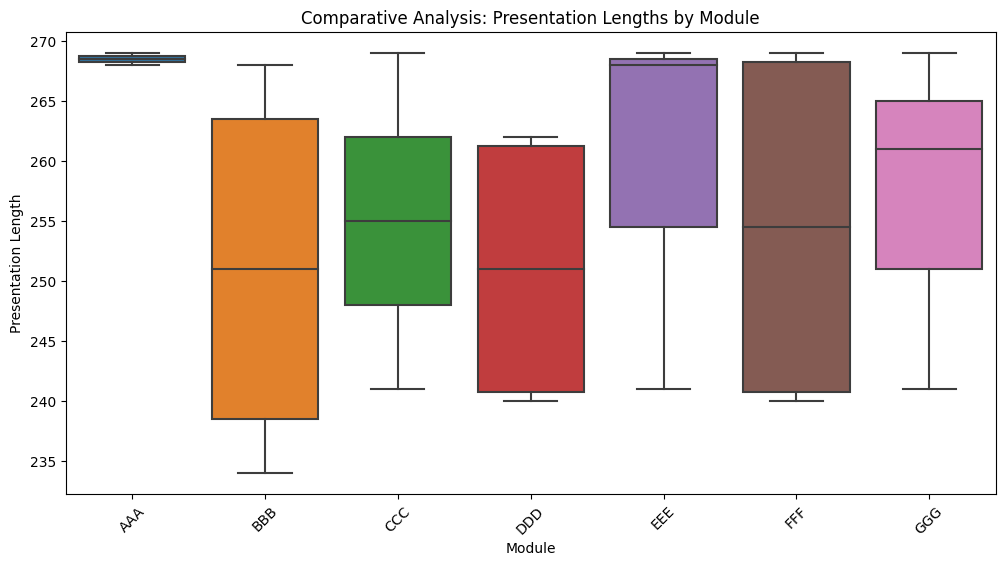

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to compare presentation lengths across different modules
plt.figure(figsize=(12, 6))
sns.boxplot(data=courses, x='code_module', y='module_presentation_length')
plt.xticks(rotation=45)
plt.title('Comparative Analysis: Presentation Lengths by Module')
plt.xlabel('Module')
plt.ylabel('Presentation Length')
plt.show()


This shows that AAA is presented for nothing less that 268 days for all streams while BBB for example was presented for 238 days in some cohorts

SEGMENTATION

In [17]:
#summary statistics by module
module_grouped = courses.groupby('code_module')
for module, group in module_grouped:
    print(f"Module: {module}")
    print("Mean:", group['module_presentation_length'].mean())
    print("Median:", group['module_presentation_length'].median())
    print("Min:", group['module_presentation_length'].min())
    print("Max:", group['module_presentation_length'].max())
    print("count", group['module_presentation_length'].count())
    print()


Module: AAA
Mean: 268.5
Median: 268.5
Min: 268
Max: 269
count 2

Module: BBB
Mean: 251.0
Median: 251.0
Min: 234
Max: 268
count 4

Module: CCC
Mean: 255.0
Median: 255.0
Min: 241
Max: 269
count 2

Module: DDD
Mean: 251.0
Median: 251.0
Min: 240
Max: 262
count 4

Module: EEE
Mean: 259.3333333333333
Median: 268.0
Min: 241
Max: 269
count 3

Module: FFF
Mean: 254.5
Median: 254.5
Min: 240
Max: 269
count 4

Module: GGG
Mean: 257.0
Median: 261.0
Min: 241
Max: 269
count 3



Exploring the Assessment data file

In [24]:
#Display the first few rows of the dataframe
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [21]:
assessments.shape

(206, 6)

In [22]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    object 
 5   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [25]:
# Get unique assessment types
unique_types = assessments['assessment_type'].unique()
print("Unique Assessment Types:", unique_types)

Unique Assessment Types: ['TMA' 'Exam' 'CMA']


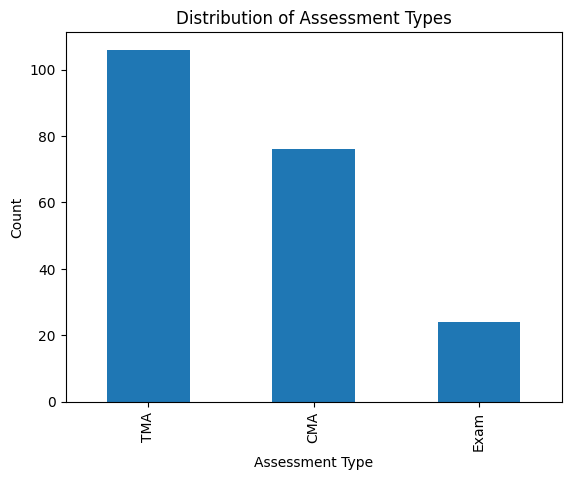

In [28]:
# bar plots to Visualize assessment types
# Bar plots 
assessments['assessment_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Assessment Types')
plt.xlabel('Assessment Type')
plt.ylabel('Count')
plt.show()

Three types of assessments exist: 
Tutor Marked Assessment (TMA) 
Computer Marked Assessment (CMA) and 
Final Exam (Exam).

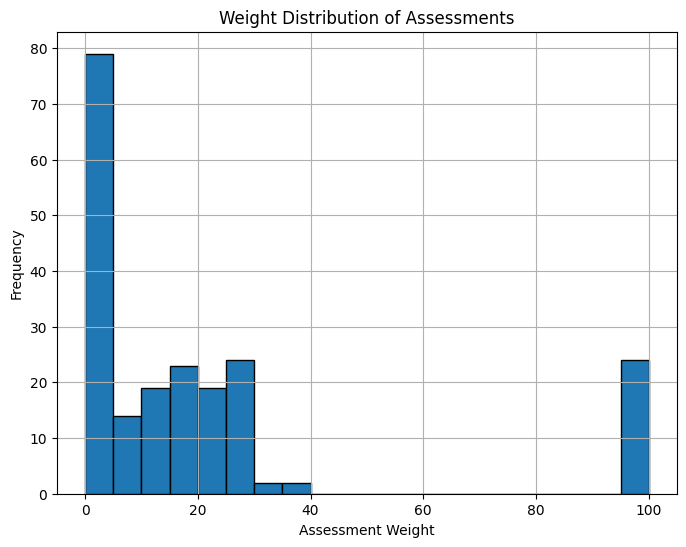

In [30]:
# Plot histogram of assessment weights
plt.figure(figsize=(8, 6))
plt.hist(assessments['weight'], bins=20, edgecolor='black')
plt.title('Weight Distribution of Assessments')
plt.xlabel('Assessment Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [31]:
#group assessments based on unique combinations of code module, assessment type and code_presentation
#count the number of rows in each group
assessments.drop(['date','weight'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).count()

id_assessment
code_module assessment_type code_presentation               
AAA         Exam            2013J                          1
                            2014J                          1
            TMA             2013J                          5
                            2014J                          5
BBB         CMA             2013B                          5
                            2013J                          5
                            2014B                          5
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          5
CCC         CMA             2014B                          4
                            2014J                          4
            Exam            2014B                          2
                            2014J                          2
            TMA             2014B                          4
                            2014J                          4
DDD         CMA             2013B                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          6
EEE         Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          4
                            2014B                          4
                            2014J                          4
FFF         CMA             2013B                          7
                            2013J                          7
                            2014B                          7
                            2014J                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          5
                            2013J                          5
                            2014B                          5
                            2014J                          5
GGG         CMA             2013J                          6
                            2014B                          6
                            2014J                          6
            Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          3
                            2014B                          3
                            2014J                          3

Course C have 2 final exams. Course A doesn't have any Computer Marked Assessment (CMA). Each course has at least 3 TMAs.

In [34]:
assessments.drop(['id_assessment'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).agg(['min','max'])

date      weight       
                                               min  max    min    max
code_module assessment_type code_presentation                        
AAA         Exam            2013J                ?    ?  100.0  100.0
                            2014J                ?    ?  100.0  100.0
            TMA             2013J              117   54   10.0   30.0
                            2014J              117   54   10.0   30.0
BBB         CMA             2013B              124   89    1.0    1.0
                            2013J              131   96    1.0    1.0
                            2014B              117   82    1.0    1.0
            Exam            2013B                ?    ?  100.0  100.0
                            2013J                ?    ?  100.0  100.0
                            2014B                ?    ?  100.0  100.0
                            2014J                ?    ?  100.0  100.0
            TMA             2013B              124   89    5.0   18.0
                            2013J              131   96    5.0   18.0
                            2014B              117   82    5.0   18.0
                            2014J              110   54    0.0   35.0
CCC         CMA             2014B              137   67    2.0    8.0
                            2014J              144   67    2.0    8.0
            Exam            2014B                ?    ?  100.0  100.0
                            2014J                ?    ?  100.0  100.0
            TMA             2014B              102   32    9.0   22.0
                            2014J              109   32    9.0   22.0
DDD         CMA             2013B              114   79    2.0    6.0
            Exam            2013B              240  240  100.0  100.0
                            2013J              261  261  100.0  100.0
                            2014B              241  241  100.0  100.0
                            2014J                ?    ?  100.0  100.0
            TMA             2013B              116   81    7.5   15.0
                            2013J              123   88   10.0   20.0
                            2014B              116   74   10.0   20.0
                            2014J              111   62    5.0   25.0
EEE         Exam            2013J              235  235  100.0  100.0
                            2014B              228  228  100.0  100.0
                            2014J              235  235  100.0  100.0
            TMA             2013J              124   68   16.0   28.0
                            2014B              117   68   16.0   28.0
                            2014J              131   68   16.0   28.0
FFF         CMA             2013B              222  222    0.0    0.0
                            2013J              236  236    0.0    0.0
                            2014B              227  227    0.0    0.0
                            2014J              241  241    0.0    0.0
            Exam            2013B              222  222  100.0  100.0
                            2013J              236  236  100.0  100.0
                            2014B              227  227  100.0  100.0
                            2014J              241  241  100.0  100.0
            TMA             2013B              131   89   12.5   25.0
                            2013J              131   96   12.5   25.0
                            2014B              129   87   12.5   25.0
                            2014J              136   94   12.5   25.0
GGG         CMA             2013J              229  229    0.0    0.0
                            2014B              222  222    0.0    0.0
                            2014J              229  229    0.0    0.0
            Exam            2013J              229  229  100.0  100.0
                            2014B              222  222  100.0  100.0
                            2014J              229  229  100.0  100.0
            TMA             2013J              124   61 

**Course G has all CMAs on the same date. 
**Course G is also abnormal in term of assignment date: all the other courses have first assignment within the first 30 days, but first assignment for course G is on day 61

**we can also see some missing final exams date